# Importing and Cleaning

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#reference new csv
file="../clean_data.csv"
df=pd.read_csv(file)

df=df.drop(columns="Unnamed: 0")


In [3]:
countries_df=df[["Title", "Country", "Language", "Rating"]]
#fix error by converting Country to string
countries_df['Country'] = countries_df['Country'].astype(str)

countries_df

C:\Users\Rachel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Country,Language,Rating
0,Avatar,USA,English,PG-13
1,Pirates of the Caribbean: At World's End,USA,English,PG-13
2,Spectre,UK,English,PG-13
3,The Dark Knight Rises,USA,English,PG-13
4,John Carter,USA,English,PG-13
...,...,...,...,...
3811,Primer,USA,English,PG-13
3812,Cavite,Philippines,English,Not Rated
3813,El Mariachi,USA,Spanish,R
3814,Newlyweds,USA,English,Not Rated


In [4]:
countries_df.drop_duplicates(subset="Title", keep="first")


,Title,Country,Language,Rating
0,Avatar,USA,English,PG-13
1,Pirates of the Caribbean: At World's End,USA,English,PG-13
2,Spectre,UK,English,PG-13
3,The Dark Knight Rises,USA,English,PG-13
4,John Carter,USA,English,PG-13
...,...,...,...,...
3811,Primer,USA,English,PG-13
3812,Cavite,Philippines,English,Not Rated
3813,El Mariachi,USA,Spanish,R
3814,Newlyweds,USA,English,Not Rated


In [5]:
country_groupby_df=countries_df.groupby("Country").count()
country_groupby_df.head(5)

,Title,Language,Rating
Country,,,
Afghanistan,1,1,1
Argentina,3,3,3
Aruba,1,1,1
Australia,40,40,40
Belgium,1,1,1


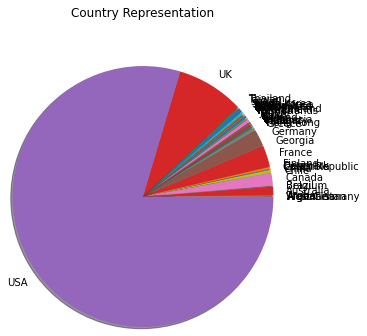

In [6]:
countries=country_groupby_df.index
count=country_groupby_df["Title"]
plt.title("Country Representation", y=1.3)
plt.pie(count, labels=countries, shadow=True, radius=1.5)


plt.savefig("../Images/Countries_Part1_USA.png")
plt.show()
# countries=country_groupby_df.index
# count=country_groupby_df["Title"]
# plt.ylabel=countries
# plt.figure(figsize=(10,8))
# plt.barh(countries,count)

# Remove USA and UK to see rest of world data

In [7]:
country_groupby_df=country_groupby_df.sort_values(by="Title", ascending=False)

rest_of_world_df=country_groupby_df.drop(['USA',"UK"])
rest_of_world_df.head(2)

,Title,Language,Rating
Country,,,
France,103,103,103
Germany,80,80,80


In [8]:
#drop Official site and New Line
rest_of_world_df=rest_of_world_df.drop(['Official site',"New Line"])

rest_of_world_df.head(2)

,Title,Language,Rating
Country,,,
France,103,103,103
Germany,80,80,80


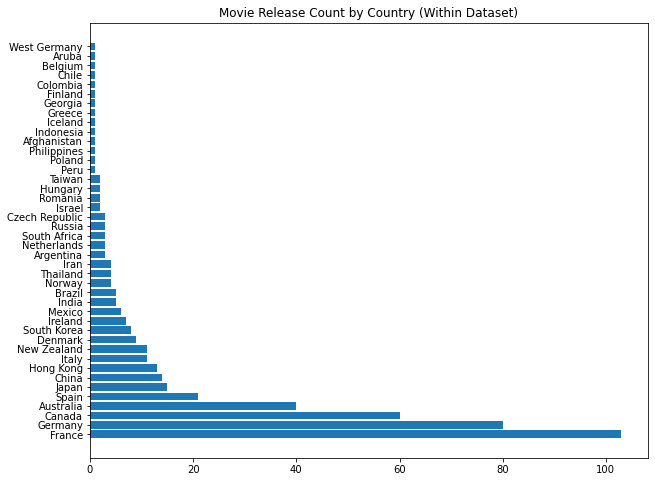

In [9]:
countries=rest_of_world_df.index
count=rest_of_world_df["Title"]
plt.ylabel=countries
plt.figure(figsize=(10,8))
plt.title("Movie Release Count by Country (Within Dataset)")
plt.barh(countries,count)

plt.savefig("../Images/No_USA_Country_Rep.png")
plt.show()

In [10]:
least_rep_df=countries_df[(countries_df["Country"]=="Peru")|(countries_df["Country"]=="Afghanistan")|
                         (countries_df["Country"]=="Poland")| (countries_df["Country"]=="Indonesia")|
                         (countries_df["Country"]=="Philippines")|(countries_df["Country"]=="Iceland")|
                         (countries_df["Country"]=="Greece")|(countries_df["Country"]=="Iceland")|
                          (countries_df["Country"]=="Finland")|(countries_df["Country"]=="Georgia")|
                          (countries_df["Country"]=="Colombia")|(countries_df["Country"]=="Chile")|
                         (countries_df["Country"]=="Belgium")|(countries_df["Country"]=="Aruba")|
                          (countries_df["Country"]=="West Germany")]
least_rep_df.groupby("Country").count().head(2)

,Title,Language,Rating
Country,,,
Afghanistan,1,1,1
Aruba,1,1,1


In [11]:
least_rep_df=least_rep_df.groupby("Country").count()
least_rep_df.head(2)

,Title,Language,Rating
Country,,,
Afghanistan,1,1,1
Aruba,1,1,1


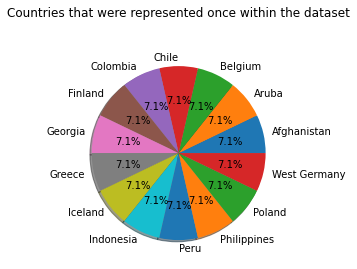

In [12]:
##Least represented countries

countries=least_rep_df.index
count=least_rep_df["Title"]
plt.title("Countries that were represented once within the dataset", y=1.1)
plt.pie(count, labels=countries, autopct='%1.1f%%', shadow=True, radius=1)

plt.savefig("../Images/Low_Rep_Countries.png")
plt.show()